<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Directions" data-toc-modified-id="Directions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Directions</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implementation</a></span><ul class="toc-item"><li><span><a href="#Calculate-primes" data-toc-modified-id="Calculate-primes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Calculate primes</a></span></li><li><span><a href="#Find-binary-and-reverse-it" data-toc-modified-id="Find-binary-and-reverse-it-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Find binary and reverse it</a></span></li></ul></li><li><span><a href="#Plot-It-Out" data-toc-modified-id="Plot-It-Out-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot It Out</a></span></li></ul></div>

> Inspired from Numberphile's video with Neil Sloane: https://youtu.be/pAMgUB51XZA?t=468

# Directions

- Take a prime $p$
- Write in binary $p_b$
- Reverse binary representation $r_b$
- Convert reversed binary $r$ to decimal (optional)
- Subtract reversed binary $r$ from prime $p$

# Implementation

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## Calculate primes

In [2]:
# Likely could be optimized better...
def get_primes(n=10**6):
    '''
    Returns NumPy array
    Will only get the first 1,000,000 primes from a file from 
    (http://www.primos.mat.br/2T_en.html)
    '''
    # Reading in whole file to memory (beware)
    data = pd.read_csv(
        'primes/primes_2_to_179424673.zip',
        sep='\t',
        header=None,
        compression='zip'
    )
    # Return a flattened ndarray (1D)
    return data.values.flatten()

In [3]:
primes = get_primes()
print(f'There are {primes.shape[0]} primes in the list with the last prime being {primes[-1]}')

There are 10000000 primes in the list with the last prime being 179424673


## Find binary and reverse it

In [4]:
def get_decimal_of_reversed_binary(decimal_number):
    # Produces '0b[0-1]*'
    binary_str = bin(decimal_number)
    # Reverse and remove the ending 'b0' from reversal
    r_b = binary_str[:1:-1]
    # Convert it back to base 10
    return int(r_b, 2)

def get_diff_from_reversed_binary(number):
    return number - get_decimal_of_reversed_binary(number)


In [5]:
def get_plotting_pairs(n_points=1000, prime_numbers=primes):
    X = prime_numbers[:n_points]
    Y = np.array([get_diff_from_reversed_binary(n) for n in X])
    return X,Y

# Plot It Out 

In [6]:
n_primes = 10**5
primes, reversed_binary_prime_diff = get_plotting_pairs(n_primes)

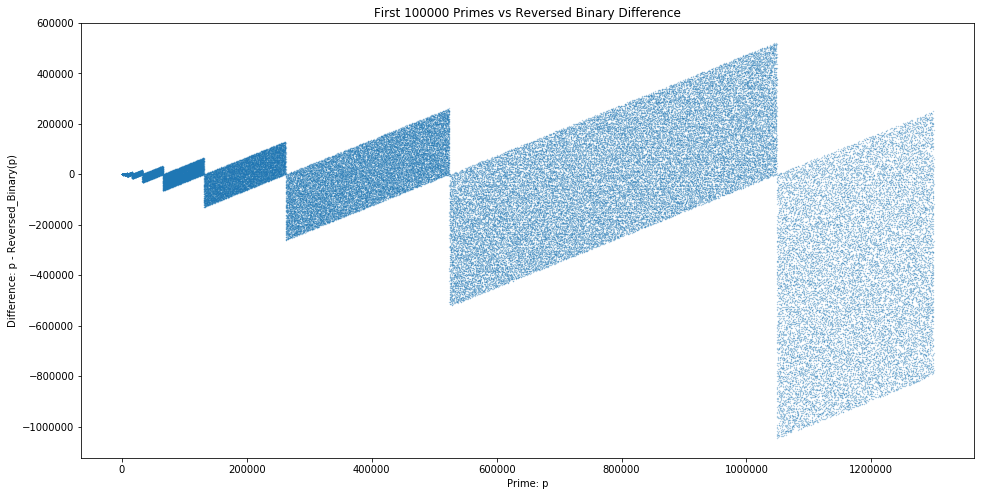

In [7]:
plt.figure(figsize=(16, 8));
plt.title(f'First {n_primes} Primes vs Reversed Binary Difference');
plt.xlabel('Prime: p');
plt.ylabel('Difference: p - Reversed_Binary(p)');

# Opacity & size for better viewing/appreciation
plt.scatter(primes, reversed_binary_prime_diff, alpha=0.5, s=0.1);